<a href="https://colab.research.google.com/github/shaynavins/MachineLearningGymDataSet/blob/main/IEEE_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The cells are somewhat interconnected at points, so ensure to run the cells in an orderly manner.

ALSO NOTE THAT ALL THE TASKS ARE DONE, HOWEVER THE ORDER IS SLIGHTLY OFF DUE TO THE ORDER AT WHICH I LEARNT A FEW NEW CONCEPTS. SORRY FOR THIS INCONVENIENCE.

In [81]:
!pip install gspread==5.4.0 camelot-py

In [84]:
#reading and loading the google sheets. this requires authentication
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()

gauth = GoogleAuth()

gauth.credentials = GoogleCredentials.get_application_default()

drive = GoogleDrive(gauth)

In [83]:
import gspread
from google.auth import default

auth.authenticate_user()
creds, _=default()

In [85]:
#a few of the imports
import pandas as pd
import numpy as np

In [86]:
access = gspread.authorize(creds)
wb = access.open_by_key('1coG4L09pbFmHXQ3LiXQq_gItQ-Kk9WfpTteus0SqmNY')

sheet = wb.get_worksheet_by_id(1695310736)

#loading the data and converting into data frames
data = sheet.get_all_records()
df = pd.DataFrame(data)
columnnames = df.columns



print("FIRST 5 ROWS:")
print(df[:5])

print("COLUMN NAMES")
print(columnnames)

print("NUMBER OF ROWS AND COLUMNS")
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")





FIRST 5 ROWS:
                             Title  \
0  0        Partner plank band row   
1  1  Banded crunch isometric hold   
2  2         FYR Banded Plank Jack   
3  3                 Banded crunch   
4  4                        Crunch   

                                                Desc      Type    BodyPart  \
0  The partner plank band row is an abdominal exe...  Strength  Abdominals   
1  The banded crunch isometric hold is an exercis...  Strength  Abdominals   
2  The banded plank jack is a variation on the pl...  Strength  Abdominals   
3  The banded crunch is an exercise targeting the...  Strength  Abdominals   
4  The crunch is a popular core exercise targetin...  Strength  Abdominals   

  Equipment         Level Rating RatingDesc  
0     Bands  Intermediate      0             
1     Bands  Intermediate                    
2     Bands  Intermediate                    
3     Bands  Intermediate                    
4     Bands  Intermediate                    
COLUMN NAMES

With respect to discrepencies, it is true that there are many empty cells which are stored as empty strings and not NaN values. Hence, the following queries fail to function. Hence, we use the df.replace() function to swap out the empty strings with NaN.  

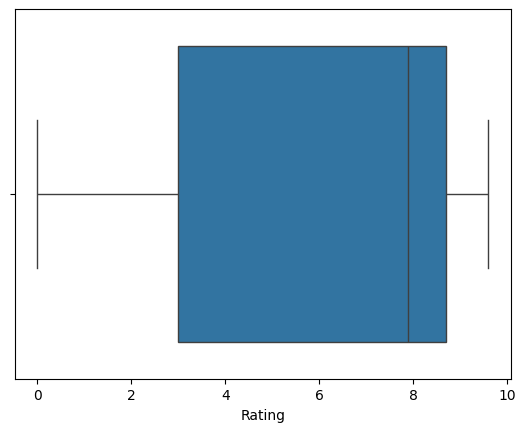

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0                    2918 non-null   int64   
 1   Title            2918 non-null   object  
 2   Desc             1368 non-null   object  
 3   Type             2918 non-null   object  
 4   BodyPart         2918 non-null   category
 5   Equipment        2918 non-null   category
 6   Level            2918 non-null   object  
 7   Rating           1031 non-null   float64 
 8   BodyPart_codes   2918 non-null   int8    
 9   Equipment_codes  2918 non-null   int8    
dtypes: category(2), float64(1), int64(1), int8(2), object(4)
memory usage: 149.6+ KB


,,Rating,BodyPart_codes,Equipment_codes
count,2918.000000,1031.000000,2918.000000,2918.000000
mean,1458.500000,5.919690,7.947910,4.154901
std,842.498368,3.584607,5.629641,3.454885
min,0.000000,0.000000,0.000000,0.000000
25%,729.250000,3.000000,3.000000,2.000000
50%,1458.500000,7.900000,9.000000,2.000000
75%,2187.750000,8.700000,13.000000,4.000000
max,2917.000000,9.600000,16.000000,12.000000


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Rating'])
plt.show()
df.info()
df.describe()



Step 2: Data Cleaning


In [89]:
#indentifying missing values

df = df.replace(r'^\s*$', np.nan, regex=True)
missing_rating_count = df['Rating'].isnull().sum()

for column in df.columns:
  missing_count = df[column].isnull().sum()
  print(f"Number of missing values in '{column}': {missing_count}")



Number of missing values in '': 0
Number of missing values in 'Title': 0
Number of missing values in 'Desc': 1550
Number of missing values in 'Type': 0
Number of missing values in 'BodyPart': 0
Number of missing values in 'Equipment': 0
Number of missing values in 'Level': 0
Number of missing values in 'Rating': 1887
Number of missing values in 'RatingDesc': 2056


<ipython-input-89-76ea3123d72c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(r'^\s*$', np.nan, regex=True)


Handling missing values:
  there are multiple methods of handling missing values in a dataset.

  1. the entire column/row as a dataset with many rows and columns will not be affected much
  2. forward and backward fill. the same value as the above or below value can be filled in the missing value cell also.

  3. with respect to filling with mean, we can fill numerical columns by using .fillna
  4. the same can be done with median also
  5. categorical columns can be handled with the filling of mode.

In [90]:
columnsdelete = ['RatingDesc']
df = df.drop(columns=columnsdelete)

print(df.head())

                             Title  \
0  0        Partner plank band row   
1  1  Banded crunch isometric hold   
2  2         FYR Banded Plank Jack   
3  3                 Banded crunch   
4  4                        Crunch   

                                                Desc      Type    BodyPart  \
0  The partner plank band row is an abdominal exe...  Strength  Abdominals   
1  The banded crunch isometric hold is an exercis...  Strength  Abdominals   
2  The banded plank jack is a variation on the pl...  Strength  Abdominals   
3  The banded crunch is an exercise targeting the...  Strength  Abdominals   
4  The crunch is a popular core exercise targetin...  Strength  Abdominals   

  Equipment         Level  Rating  
0     Bands  Intermediate     0.0  
1     Bands  Intermediate     NaN  
2     Bands  Intermediate     NaN  
3     Bands  Intermediate     NaN  
4     Bands  Intermediate     NaN  


In [92]:

import re
title = df['Title']
def rename(title):
  title = title.lower() #to lower case
  title = title.strip() #removes whitespaces before and after title
  title = re.sub(' +', ' ', title) # if there is more than one white space, it replaces with one white space
  title = re.sub('[^a-zA-Z0-9 ]', ' ', title)
  return title

df['Title'] = df['Title'].apply(rename)
print(title)


0                               partner plank band row
1                         banded crunch isometric hold
2                                fyr banded plank jack
3                                        banded crunch
4                                               crunch
                             ...                      
2913                              ez bar skullcrusher 
2914    lying close grip barbell triceps press to chin
2915            ez bar skullcrusher   gethin variation
2916                                  tbs skullcrusher
2917                       30 arms ez bar skullcrusher
Name: Title, Length: 2918, dtype: object


to find the top 5 most frequent exercises we must check the most frequently occuring cell in the first column. this can be done by calculating the value counts

1. band suspended kettlebell bench press: 3
2. seated cable rows: 3
3. double kettlebell push press: 2
4. single arm dumbbell snatch: 2
5. barbell curl: 2


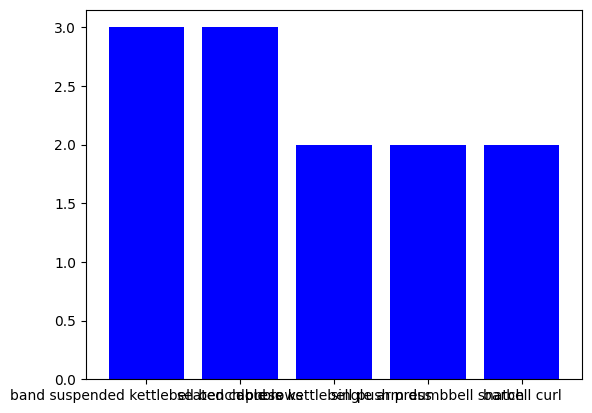

In [93]:
import matplotlib.pyplot as plt

count = df['Title'].value_counts(ascending=False)

x1 = [1, 2, 3, 4, 5]

topvalues = count.index[:5]
topcounts = count.iloc[:5]

plt.bar(topvalues, topcounts, color='b')

for i  in range(min(5, len(count))):

  value = count.index[i]
  print(f"{i+1}. {value}: {count[value]}")

In [94]:
df['BodyPart'] = df['BodyPart'].astype('category')
df['BodyPartcodes'] = df['BodyPart'].cat.codes

df['Equipment'] = df['Equipment'].astype('category')
df['Equipmentcodes'] = df['Equipment'].cat.codes

# View the converted DataFrame
print(df)

                                                     Title  \
0        0                          partner plank band row   
1        1                    banded crunch isometric hold   
2        2                           fyr banded plank jack   
3        3                                   banded crunch   
4        4                                          crunch   
...    ...                                             ...   
2913  2913                             ez bar skullcrusher   
2914  2914  lying close grip barbell triceps press to chin   
2915  2915            ez bar skullcrusher gethin variation   
2916  2916                                tbs skullcrusher   
2917  2917                     30 arms ez bar skullcrusher   

                                                   Desc      Type    BodyPart  \
0     The partner plank band row is an abdominal exe...  Strength  Abdominals   
1     The banded crunch isometric hold is an exercis...  Strength  Abdominals   
2     The ba

In [ ]:
#nunique can be used to identify the number of unique values

unique = df['BodyPart'].nunique()
print(f"Number of unique values in '{'BodyPart'}': {unique}")


unique = df['Equipment'].nunique()
print(f"Number of unique values in '{'Equipment'}': {unique}")


Number of unique values in 'BodyPart': 17
Number of unique values in 'Equipment': 13


In [ ]:
# finding the highest value in the Rating column and printing the corresponding row

highest = df['Rating'].idxmax()

highestrow = df.loc[highest]
print(highestrow)

                                                             0
Title                                      partnerplankbandrow
Desc         The partner plank band row is an abdominal exe...
Type                                                  Strength
BodyPart                                            Abdominals
Equipment                                                Bands
Level                                             Intermediate
Rating                                      51967063516.799995
Name: 0, dtype: object


**CLUSTERING**

in Kmeans method

In [96]:
import random

rating = df['Rating']

#threshold = random.uniform(rating.min(), rating.max())

ratingthreshold = 7.5
highlevel = 'Expert'
lowlevel = 'Beginner'

HH = rating[(rating > ratingthreshold) & (df['Level'] == highlevel)]
LH = rating[(rating < ratingthreshold) & (df['Level'] == highlevel)]
LL = rating[(rating < ratingthreshold) & (df['Level'] == lowlevel)]
HL = rating[(rating > ratingthreshold) & (df['Level'] == lowlevel)]

c1 = 1
c2 = 1
c3 = 1
c4 = 1

# Check if the Dataframes are empty before sampling
if len(HH) < c1:
    c1 = len(HH)  # Adjust sample size if necessary
if len(LH) < c2:
    c2 = len(LH)
if len(LL) < c3:
    c3 = len(LL)
if len(HL) < c4:
    c4 = len(HL)

#Only sample if the population size is bigger than 0
first = random.sample(list(HH), c1) if len(HH) > 0 else []
second = random.sample(list(LH), c2) if len(LH) > 0 else []
third = random.sample(list(LL), c3) if len(LL) > 0 else []
fourth = random.sample(list(HL), c4) if len(HL) > 0 else []


print("Cluster 1:", first)
print("Cluster 2:", second)
print("Cluster 3:", third)
print("Cluster 4:", fourth)

Cluster 1: [9.0]
Cluster 2: [7.0]
Cluster 3: [0.0]
Cluster 4: [8.1]


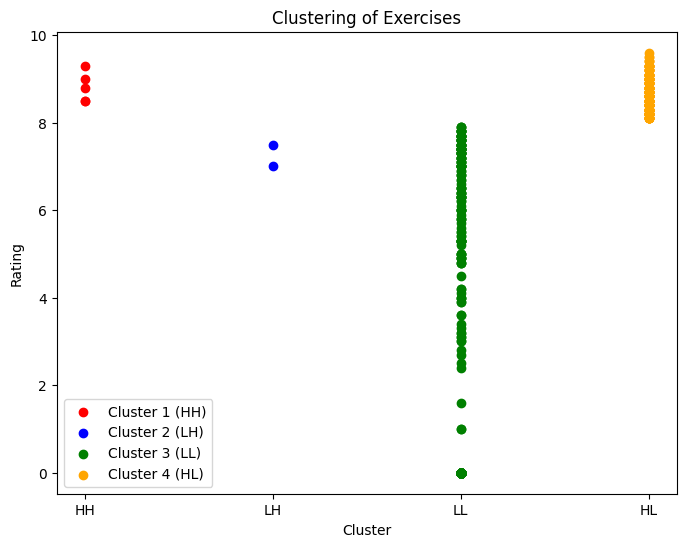

In [97]:
import random
import matplotlib.pyplot as plt

rating = df['Rating']

#threshold = random.uniform(rating.min(), rating.max())

ratingthreshold = 8
highlevel = 'Expert'
lowlevel = 'Beginner'

HH = rating[(rating > ratingthreshold) & (df['Level'] == highlevel)]
LH = rating[(rating < ratingthreshold) & (df['Level'] == highlevel)]
LL = rating[(rating < ratingthreshold) & (df['Level'] == lowlevel)]
HL = rating[(rating > ratingthreshold) & (df['Level'] == lowlevel)]

# Plotting the clusters directly (no sampling)
plt.figure(figsize=(8, 6))

# Create x-axis values for plotting (arbitrary since we only have 'Rating')
x1 = [1] * len(HH)
x2 = [2] * len(LH)
x3 = [3] * len(LL)
x4 = [4] * len(HL)

plt.scatter(x1, HH, color='red', label='Cluster 1 (HH)')
plt.scatter(x2, LH, color='blue', label='Cluster 2 (LH)')
plt.scatter(x3, LL, color='green', label='Cluster 3 (LL)')
plt.scatter(x4, HL, color='orange', label='Cluster 4 (HL)')

plt.xlabel('Cluster')
plt.ylabel('Rating')
plt.title('Clustering of Exercises')
plt.xticks([1, 2, 3, 4], ['HH', 'LH', 'LL', 'HL'])  # Set x-axis labels
plt.legend()
plt.show()

# A LITTLE EXTRA ANALYSIS

In [ ]:
level = input('Beginner, Intermediate, Expert: ');
ratingi = input('High or Low: ')


rating = df['Rating']

if (ratingi == 'High'):
  rating > ratingthreshold

if (ratingi == 'Low'):
  rating < ratingthreshold

HI = rating[(rating > ratingthreshold) & (df['Level'] == 'Intermediate')]
LI = rating[(rating < ratingthreshold) & (df['Level'] == 'Intermediate')]

#print("showing results... for:" + level + "and" + rating)

if ((level == 'Beginner') & (ratingi == 'High')):
    print(LH)

if ((level == 'Beginner') & (ratingi == 'Low')):
    print(LL)

if ((level == 'Expert') & (ratingi == 'Low')):
    print(HL)

if ((level == 'Expert') & (ratingi == 'High')):
    print(HH)

if ((level == 'Intermediate') & (ratingi == 'Low')):
    print(LH)

if ((level == 'Intermediate') & (ratingi == 'High')):
    print(HI)

if ((level == 'Intermediate') & (ratingi == 'Low')):
    print(LI)




In [ ]:
import pandas as pd
data = sheet.get_all_records()

df = pd.DataFrame(data)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

print(df['Rating'])
averageratingtitle = df.groupby('Title')['Rating'].mean()

maxrating = averageratingtitle.max()

exercisemaxrating = averageratingtitle[averageratingtitle == max_rating].index[0]

print(averageratingtitle)


print("the max average is of: ", exercisemaxrating, maxrating)

In [ ]:
Ptable = pd.pivot_table(
    df, values=['Rating'], index=['Title', 'RatingDesc'], columns='Level', aggfunc='mean', fill_value=0
)
print(Ptable)


In [ ]:
#it only makes sense to first identify which exercises are rated and which arent so:
rated = df[df['Rating'].notna()]

#now we will have to group the exercises based on bodypart
count = rated.groupby('BodyPart')['Title'].count().sort_values(ascending = False)

print(count)


# **ANALYSIS SUMMARY**

The Gym Dataset was analysed at different stages using an array of operations such as sorting, plotting, adding, and finding extended description of each column's numerical data. In summary, the first managed to clean my data and remove the last column as it had a large amount of empty cells interfering with other data calculations. Consequently, renaming and formatting of the dataset was also done to later receive queries from a potential user.


Based on your analysis, propose a data-driven recommendation system for gym-goers. Which exercises would you recommend and why?


As a bonus, I have included a query system for potential gym-goers to enter their requirements and receive recommendations. Apart from this, we can also judge based on rating and rating description as I have done in the previous code cells.